# Exploracionde datos (Dataset Limpio)

In [ ]:
!pip install pandas seaborn matplotlib

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40881 non-null  object        
 1   trending_date           40881 non-null  datetime64[ns]
 2   title                   40881 non-null  object        
 3   channel_title           40881 non-null  object        
 4   publish_time            40881 non-null  datetime64[ns]
 5   tags                    40881 non-null  object        
 6   views                   40881 non-null  int64         
 7   likes                   40881 non-null  int64         
 8   dislikes                40881 non-null  int64         
 9   comment_count           40881 non-null  int64         
 10  thumbnail_link          40881 non-null  object        
 11  comments_disabled       40881 non-null  bool          
 12  ratings_disabled     

,trending_date,publish_time,views,likes,dislikes,comment_count,lat,lon,like_dislike_ratio,views_comments_ratio,days_to_trending
count,40881,40881,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04,40881.0000,40881.0000,40881.0000,4.088100e+04,40881.0000
mean,2018-02-27 05:29:22.882512640,2018-02-24 08:05:59.984320256,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03,52.0259,-88.8177,44.1840,1.909399e+04,3.4815
min,2017-11-14 00:00:00,2008-01-13 01:32:16,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00,44.5666,-139.0000,0.0000,3.283000e+00,0.0000
25%,2018-01-04 00:00:00,2018-01-02 14:21:05,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02,46.2493,-110.7333,10.7140,1.440546e+02,1.0000
50%,2018-02-26 00:00:00,2018-02-24 23:00:01,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03,49.8226,-81.2361,26.4069,2.748818e+02,1.0000
75%,2018-04-24 00:00:00,2018-04-23 01:48:54,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03,53.0167,-64.3480,58.2000,6.206867e+02,2.0000
max,2018-06-14 00:00:00,2018-06-14 02:25:38,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06,68.7675,-57.4269,2559.9000,5.124315e+07,3658.0000
std,NaN,NaN,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04,7.2131,25.1195,55.9917,5.469416e+05,59.7360



Valores nulos por columna:


video_id                  0
trending_date             0
title                     0
channel_title             0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
lat                       0
lon                       0
geometry                  0
category                  0
assignable_category       0
like_dislike_ratio        0
views_comments_ratio      0
days_to_trending          0
dtype: int64

<Axes: >

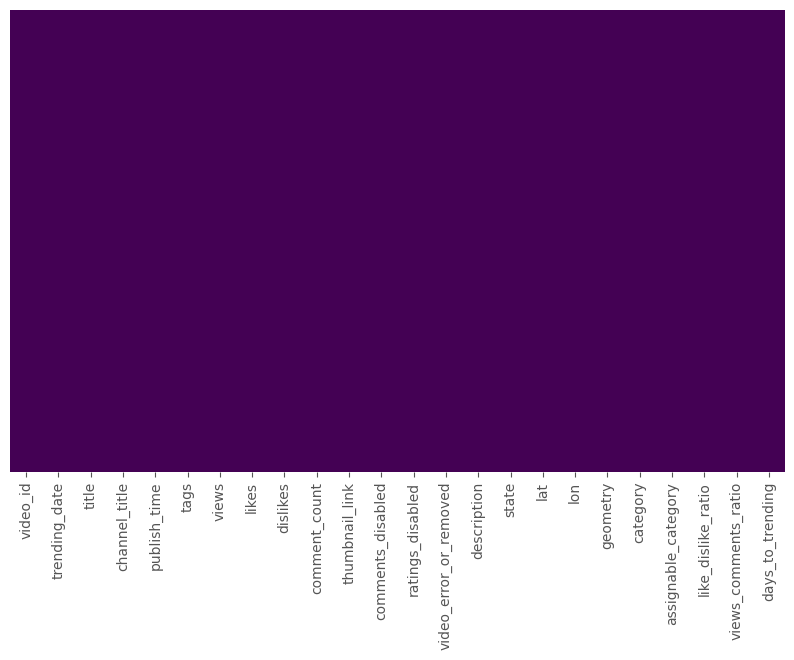

In [21]:

# Configuración de visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_palette("husl")

# Cargar Dataset LIMPIO
df = pd.read_csv('CAvideos_clean_excel.csv', encoding='utf-8')

#Estos cambios se resetean al cargar denuevo el CSV
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce') #convertir a datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce') #convertir a datetime

    
# Información básica del dataset
print("Información del dataset:")
df.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe().round(4))

# Verificar valores nulos
print("\nValores nulos por columna:")
display(df.isna().sum().sort_values())

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Análisis de Distribuciones Básicas

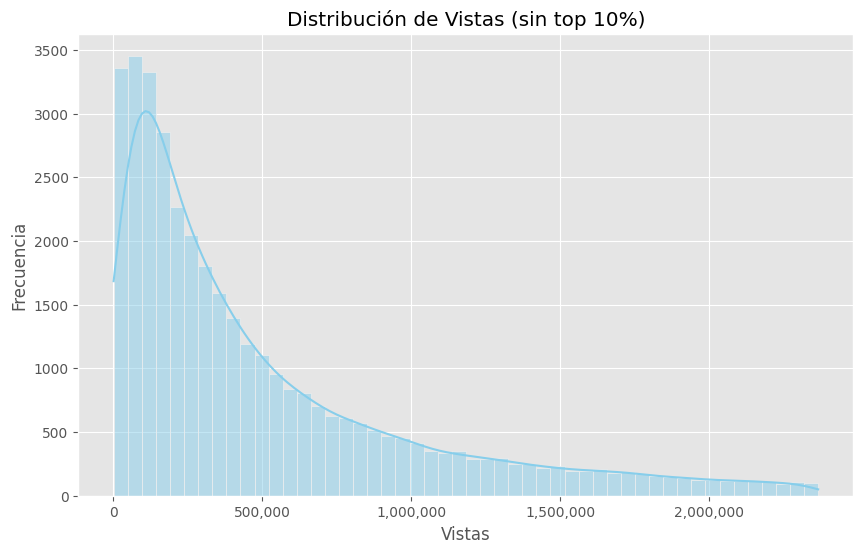

In [22]:
#Distribución de views (sin top 10%)
views_filtered = df[df['views'] < df['views'].quantile(0.90)]
plt.figure(figsize=(10, 6))
sns.histplot(views_filtered['views'], bins=50, kde=True, color='skyblue')
plt.title('Distribución de Vistas (sin top 10%)')
plt.xlabel('Vistas')
plt.ylabel('Frecuencia')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

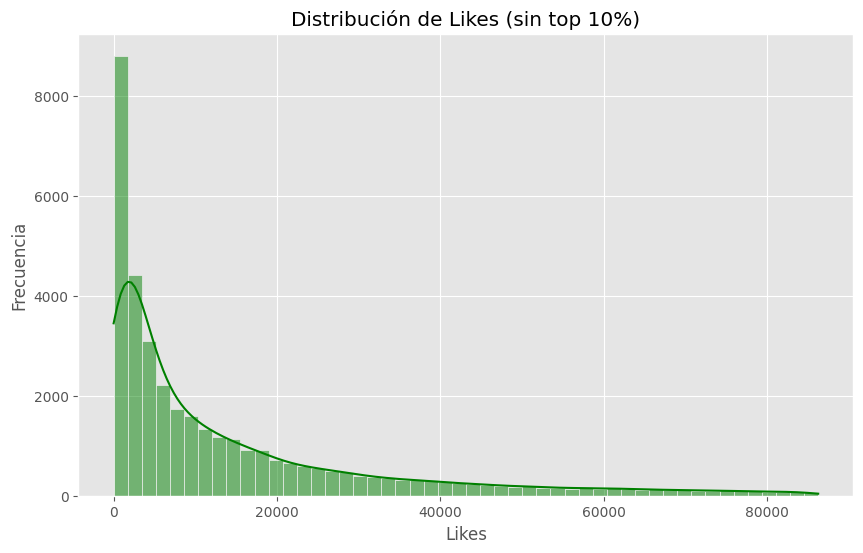

In [10]:
#Distribución de likes (sin top 10%)
likes_filtered = df[df['likes'] < df['likes'].quantile(0.90)]

plt.figure(figsize=(10, 6))
sns.histplot(likes_filtered['likes'], bins=50, kde=True, color='green')
plt.title('Distribución de Likes (sin top 10%)')
plt.xlabel('Likes')
plt.ylabel('Frecuencia')
plt.show()

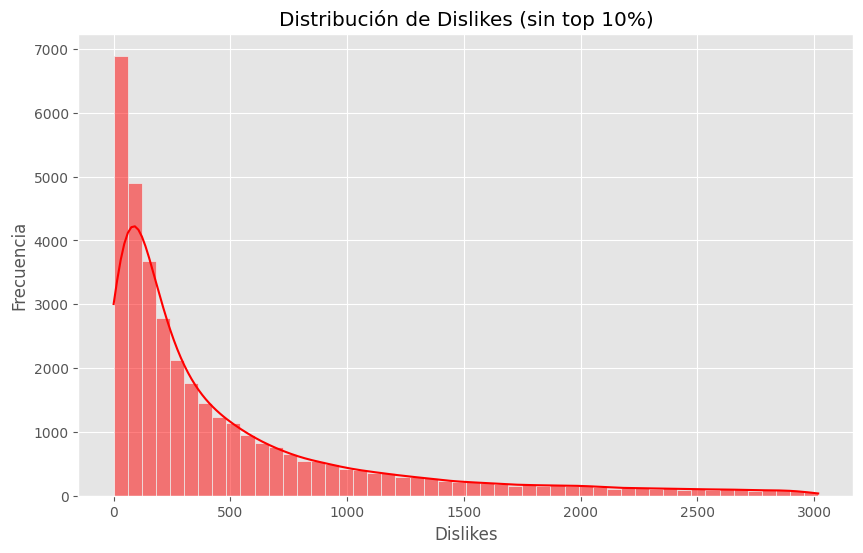

In [11]:
#Distribución de dislikes (sin top 10%)
dislikes_filtered = df[df['dislikes'] < df['dislikes'].quantile(0.90)]

plt.figure(figsize=(10, 6))
sns.histplot(dislikes_filtered['dislikes'], bins=50, kde=True, color='red')
plt.title('Distribución de Dislikes (sin top 10%)')
plt.xlabel('Dislikes')
plt.ylabel('Frecuencia')
plt.show()

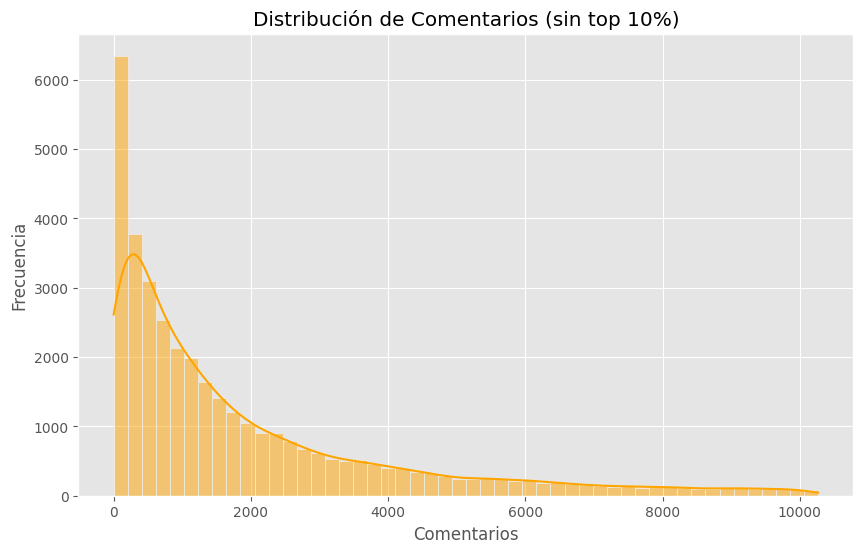

In [12]:
#Distribución de comment_count (sin top 10%)
comments_filtered = df[df['comment_count'] < df['comment_count'].quantile(0.90)]

plt.figure(figsize=(10, 6))
sns.histplot(comments_filtered['comment_count'], bins=50, kde=True, color='orange')
plt.title('Distribución de Comentarios (sin top 10%)')
plt.xlabel('Comentarios')
plt.ylabel('Frecuencia')
plt.show()

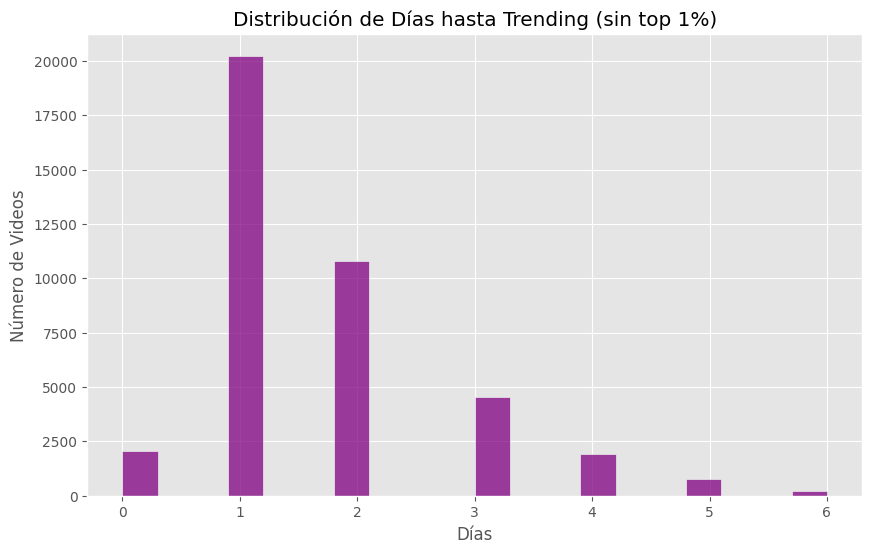

In [13]:
# Distribución de days_to_trending (sin top 1%)
days_filtered = df[df['days_to_trending'] < df['days_to_trending'].quantile(0.99)]

plt.figure(figsize=(10, 6))
sns.histplot(days_filtered['days_to_trending'], bins=20, kde=False, color='purple')
plt.title('Distribución de Días hasta Trending (sin top 1%)')
plt.xlabel('Días')
plt.ylabel('Número de Videos')
plt.show()

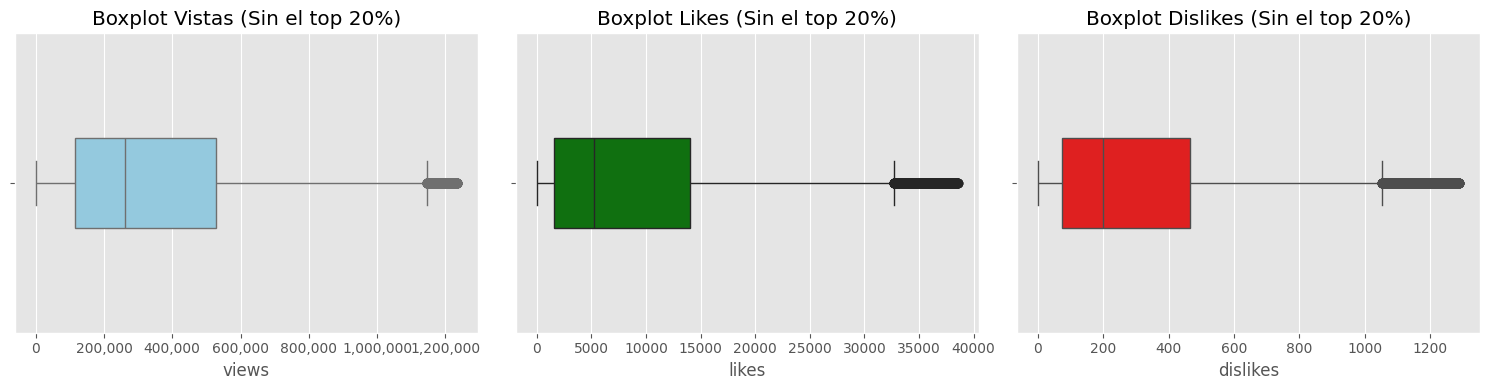

In [17]:
#Boxplot de vistas, likes y dislikes (Sin el top 20%)

plt.figure(figsize=(15, 4))

# Vistas
plt.subplot(1, 3, 1)
sns.boxplot(x=df[df['views'] < df['views'].quantile(0.80)]['views'], width=0.3, color='skyblue')
plt.title('Boxplot Vistas (Sin el top 20%)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Likes
plt.subplot(1, 3, 2)
sns.boxplot(x=df[df['likes'] < df['likes'].quantile(0.80)]['likes'], width=0.3, color='green')
plt.title('Boxplot Likes (Sin el top 20%)')

# Dislikes
plt.subplot(1, 3, 3)
sns.boxplot(x=df[df['dislikes'] < df['dislikes'].quantile(0.80)]['dislikes'], width=0.3, color='red')
plt.title('Boxplot Dislikes (Sin el top 20%)')

plt.tight_layout()
plt.show()

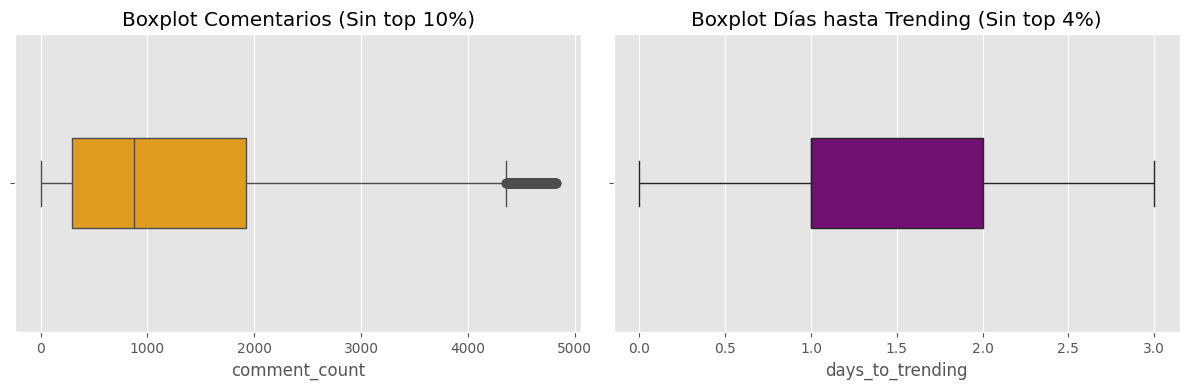

In [15]:
# Boxplot de comentarios y días hasta trending
plt.figure(figsize=(12, 4))

# Comentarios
plt.subplot(1, 2, 1)
sns.boxplot(x=df[df['comment_count'] < df['comment_count'].quantile(0.80)]['comment_count'], width=0.3, color='orange')
plt.title('Boxplot Comentarios (Sin top 10%)')

# Días hasta trending
plt.subplot(1, 2, 2)
sns.boxplot(x=df[df['days_to_trending'] < df['days_to_trending'].quantile(0.96)]['days_to_trending'], width=0.3, color='purple')
plt.title('Boxplot Días hasta Trending (Sin top 4%)')

plt.tight_layout()
plt.show()